# Setup: Installing packages and getting my bearings

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import datetime as datetime
import random as random
import seaborn as sns
import plotly as py

General note to self:
If PyCharm asks for Jupyter notebook token, try "jupyter notebook list" in terminal and copy down the string after "token=".

In [57]:
# Check the current working directory - where am I?
import os
os.getcwd()

'/Users/Shu/PycharmProjects/spring2019-solo-project-shuzhang96'

# Chicago Crime Dataset

Background thoughts: At the beginning of the class, I planned to make a super cool project - something that might not be especially practical but that would be challenging and fun. However, my goals were slowly squashed as other things began to pile up on my plate. And about a month ago, I realized that I was running short on both time and creativity. Ideally I would've worked on something I could actually use in my lab at the NIH, but my lab conducts fairly non-computational research - i.e. we do mostly bench work. Of course, sometimes data needs to be analyzed, and this is done on the computer in programs like Excel and Prism. However, no particular assay I did was so frequent or followed the same experimental format enough for me to justify making a program to conduct the analysis for me. The main thing that I do is graphing, and I usually used R for that in my previous lab - but what happened was that because I made my plots in code, no one else in the lab could tinker with them (no one else used R), which was a problem. The closest frequent "computer" thing we do in my current lab is probably checking DNA sequences, but there already exists software for doing that, and I don't think it would've been within my skillset to check for anything other than complete matches. 

So as time was running short, I figured I would find a super cool dataset to analyze and hopefully come to some interesting conclusions. I searched for a while and found some fairly cool datasets (one of them being a huge dataset of the most common tuples in different languages), but some of them were absolutely too big, and frankly not that many really stood out to me. Then I thought about how I am usually interested in city data, so I looked through the DC open data site as well as the Chicago open data site. Regarding the latter, I went to college in Chicago, so I'm a little more interested in the city than most. 

In the end, I decided to use a dataset that describes incidence of crime in Chicago from 2001 to when I downloaded the dataset, i.e. April 6th, 2019. According to the description, this dataset excludes "murders where data exists for each victim." I'm not sure if this is saying that all murders are excluded; or if there are murders where data exists for each victim and murders where that is not the case, and this dataset only includes one of the two. In looking through the Primary Types of crimes below, I do see a label for "homicide," so maybe it's the latter scenario.

I downloaded the data set from this website that contains data about various things in Chicago: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2. 

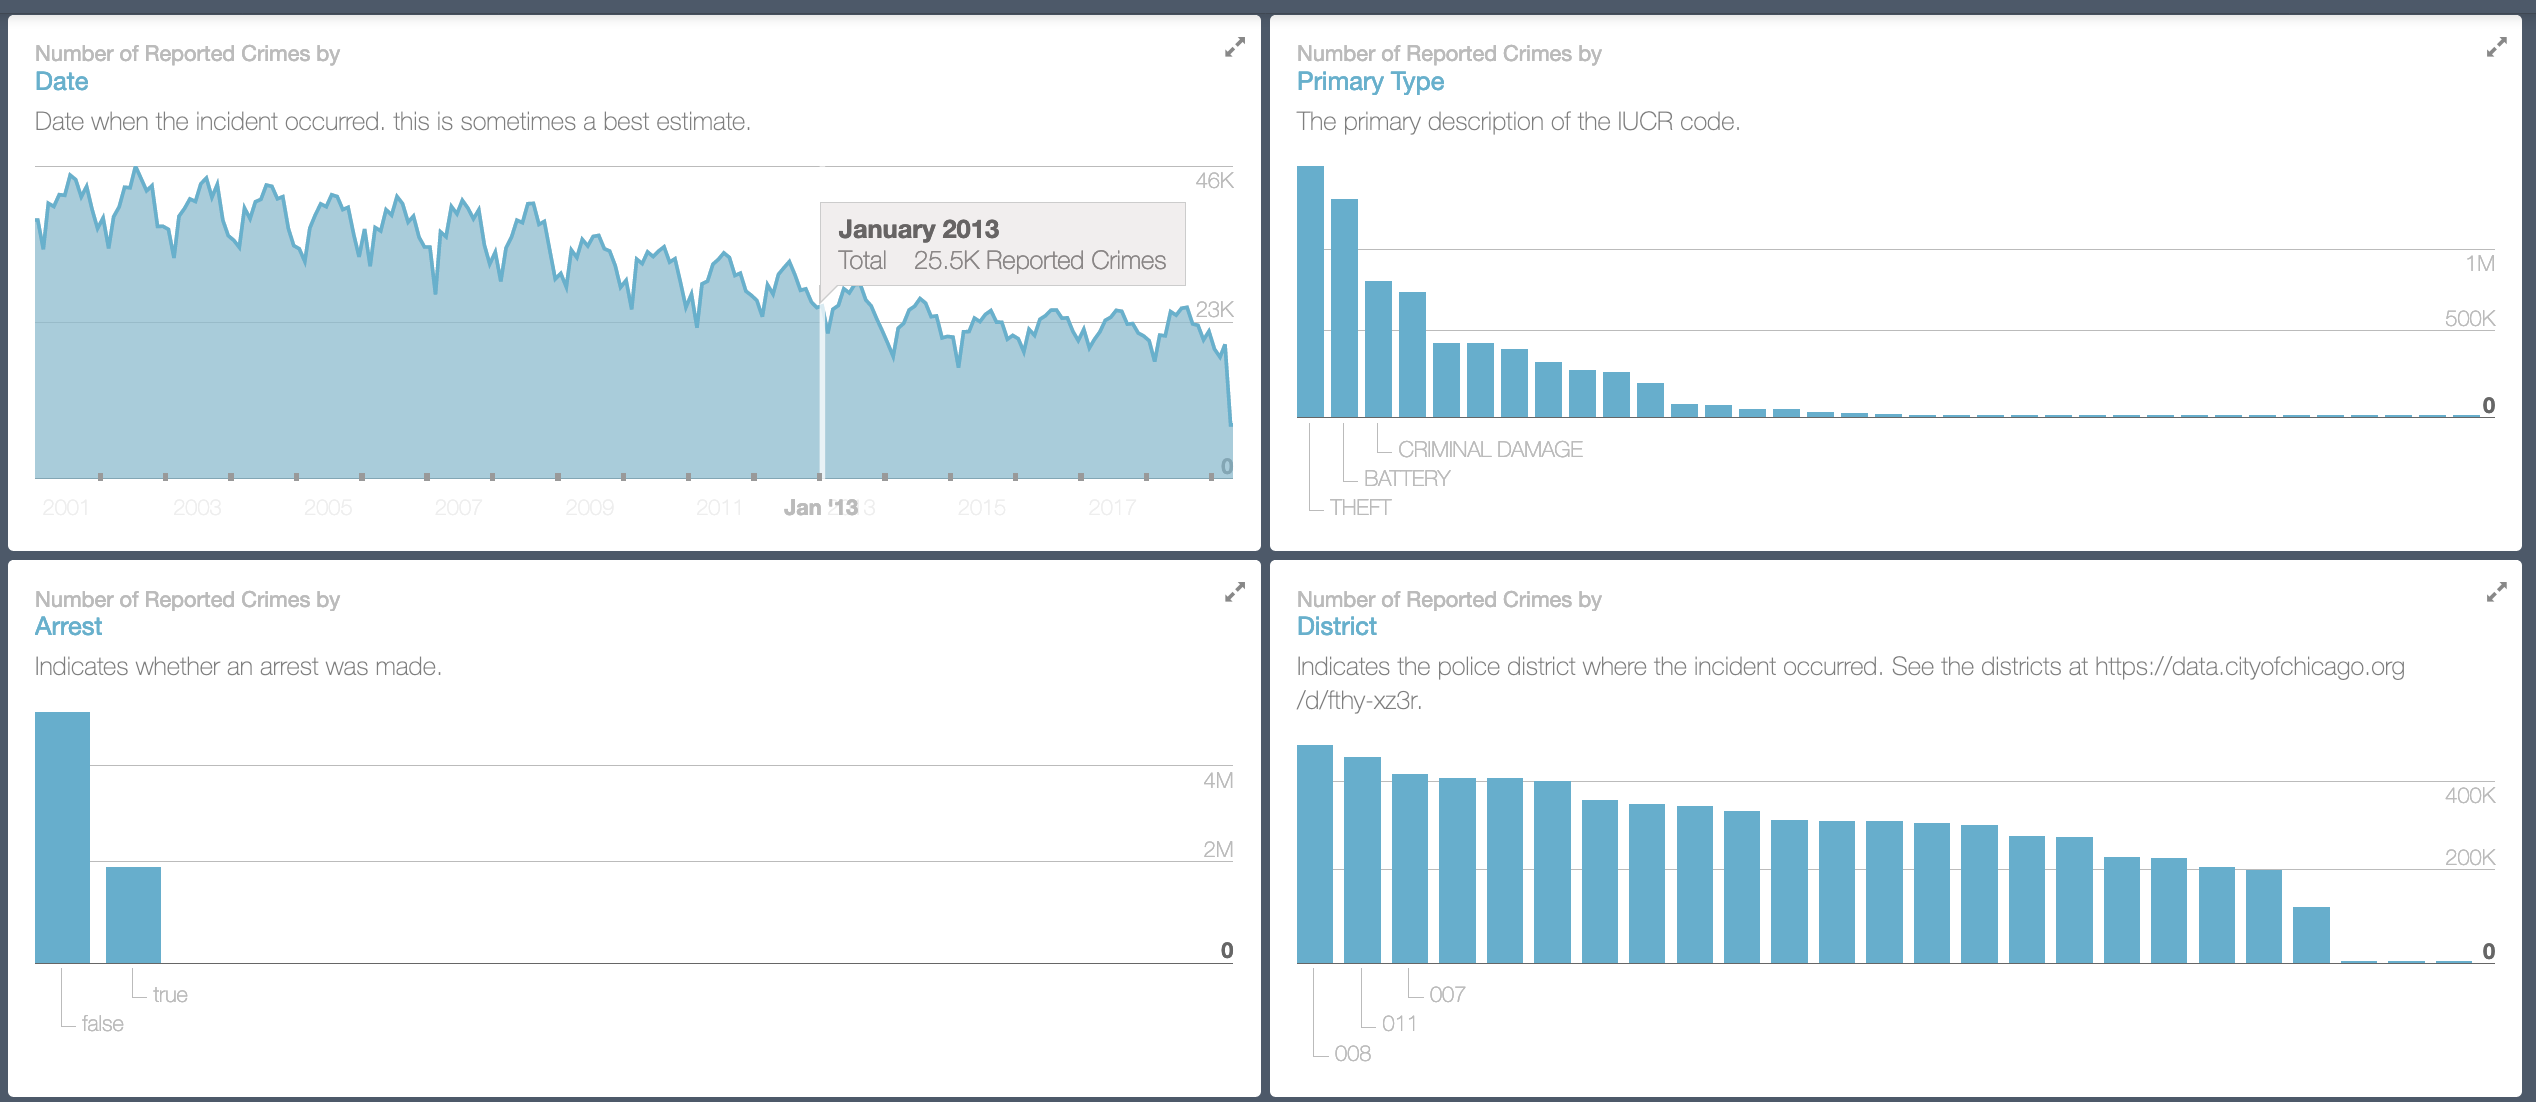

In [58]:
# Before I begin, I want to declar that the website where I downloaded the data actually provides some pretty cool interactive graphs of the data (screenshot below). 
Image.open('./Crimedata_screenshot.png')

In [4]:
# Read in the data from where I have it saved in my computer. 
# I could not figure out how to read it from online. Either that, or I never stuck around to find out; it was taking forever to process, maybe because the file was too large.
# Either way, it was far more manageable to read it directly from my computer.

url = '/Users/Shu/PycharmProjects/spring2019-solo-project-shuzhang96/Chicago_crimes_2001_present.csv'
data = pd.read_csv(url)

In [7]:
# Get an idea of what this data looks like, from the first five rows.
# Need the first line of code or pandas will truncate the dataframe and not show some of the columns.
pd.set_option('display.max_columns', 30)
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11647131,JC214628,04/06/2019 11:50:00 PM,070XX S BISHOP ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,False,True,734,7.0,17.0,67.0,26,1167881.0,1858144.0,2019,04/13/2019 04:01:56 PM,41.766286,-87.660213,"(41.766286138, -87.660213493)",17.0,22257.0,65.0,284.0,31.0,23.0,17.0,216.0
1,11647074,JC214759,04/06/2019 11:48:00 PM,015XX S STATE ST,0810,THEFT,OVER $500,STREET,False,False,131,1.0,3.0,33.0,06,1176587.0,1892569.0,2019,04/13/2019 04:01:56 PM,41.860560,-87.627266,"(41.860560022, -87.627266226)",12.0,14913.0,34.0,330.0,9.0,35.0,22.0,94.0
2,11646977,JC214654,04/06/2019 11:47:00 PM,002XX W 103RD ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,511,5.0,9.0,49.0,26,1176618.0,1836644.0,2019,04/13/2019 04:01:56 PM,41.707095,-87.628834,"(41.707095328, -87.628834415)",45.0,21861.0,45.0,569.0,22.0,19.0,10.0,256.0
3,11647124,JC214791,04/06/2019 11:45:00 PM,020XX N KEDVALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2525,25.0,35.0,20.0,08B,1148389.0,1913186.0,2019,04/13/2019 04:01:56 PM,41.917725,-87.730243,"(41.917725028, -87.730242872)",27.0,22615.0,21.0,76.0,12.0,2.0,6.0,187.0
4,11647050,JC214665,04/06/2019 11:44:00 PM,041XX W BELMONT AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,2523,25.0,31.0,21.0,04B,1148335.0,1920959.0,2019,04/13/2019 04:01:56 PM,41.939056,-87.730240,"(41.939055884, -87.730240399)",7.0,22618.0,16.0,329.0,21.0,21.0,1.0,25.0


In [26]:
# And here's what one entry looks like.
data.iloc[1,:]

ID                                                 11647074
Case Number                                        JC214759
Date                                 04/06/2019 11:48:00 PM
Block                                      015XX S STATE ST
IUCR                                                   0810
Primary Type                                          THEFT
Description                                       OVER $500
Location Description                                 STREET
Arrest                                                False
Domestic                                              False
Beat                                                    131
District                                                  1
Ward                                                      3
Community Area                                           33
FBI Code                                                 06
X Coordinate                                    1.17659e+06
Y Coordinate                            

In [7]:
# By the way, this dataset has 6.8 million lines and the file size is 1.8 GB.
data.shape

(6844979, 30)

There are about two dozen columns in this data. What are they?

Things that I'll plan to look at:
- Date: Day and time that the incident happened.
- Primary Type: General description of the incident (e.g. theft)
- Description: More detailed description of the incident (e.g. retail theft)
- Location Description: Description of the location where the crime happened (e.g. apartment)
- Arrest: Was an arrest made: Y/N?
- Domestic: Was the incident domestic-related as defined by the Illinois Domestic Violence Act?
- Community Area: Community area where the incident occurred.
- Year: Year that the incident occurred.
- Latitude, Longitude: Latitude and Longitude of the location where the incident occurred. This is shifted slightly for privacy.

Things I'm not planning to look at here:
- ID: Unique number assigned to each case. Not sure if there is any meaning to be found here anyway.
- Block: City block where this happened.
- IUCR: Stands for Illinois Uniform Crime Reporting (not the International Union of Crystallography! which was the first thing to pop up on Google). Code describing the type of incident.
- Beat: Describes the beat where the incident occurred. A beat is the smallest police geographic area.
- District: Police district where the incident occurred.
- Ward: City Council district where the incident occurred.
- FBI: FBI's crime classification.
- X,Y Coordinate: X and Y coordinates according to the State Plane Illinois East NAD 1983 projection.
- Updated On: When the data point was last updated.

In [5]:
# Given that I'm going to exclude many of the columns, I'll read in a copy of the data, called 'fdata', that contains only the columns I care about.
fdata = pd.read_csv(url, usecols = ['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Community Area', 'Year', 'Latitude', 'Longitude'])

In [9]:
# Again, let's get an idea of what this looks like.
fdata.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude
0,04/06/2019 11:50:00 PM,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,False,True,67.0,2019,41.766286,-87.660213
1,04/06/2019 11:48:00 PM,THEFT,OVER $500,STREET,False,False,33.0,2019,41.860560,-87.627266
2,04/06/2019 11:47:00 PM,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,49.0,2019,41.707095,-87.628834
3,04/06/2019 11:45:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,20.0,2019,41.917725,-87.730243
4,04/06/2019 11:44:00 PM,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,21.0,2019,41.939056,-87.730240


# Analysis
Now let's answer some basic questions. The rest of this notebook will be dedicated to this purpose. It involves a rather humble use of Python, but in the future, if I use Python, it'll probably be as a simple data analysis tool rather than a powerful programming language. So even though the usage below is on the simplistic side, it is probably realistically the type of thing I would use Python for.

Below, I'm numbering things based on the topic/question.

In [31]:
# 1a. How many crimes happen per day?

# There are 6669 days between January 1st, 2001, the first day of the dataset, and April 6th, 2019, the last day of the dataset.
days = (datetime.date(2019, 04, 06) - datetime.date(2001, 01, 01)).days

# The dataset is 6844979 rows long by the longest count. Each row represents one incident.
# I think there are some NaN's for some of the columns, which is why there are different values depending on which column you count.
# Note to self: 0 is by column, 1 is by row.
crimes = fdata.count(0)

# Thus we can divide the two numbers: crimes by days:
crimes/days

# Taking the largest number, aproximately 1026 crimes happen per day on average. I don't know what would be typical, but that seems like quite a lot!

Date                    1026.387614
Primary Type            1026.387614
Description             1026.387614
Location Description    1025.670865
Arrest                  1026.387614
Domestic                1026.387614
Community Area           934.393612
Year                    1026.387614
Latitude                1016.844504
Longitude               1016.844504
dtype: float64

In [51]:
# 1b. Another way to look at it is: how many crimes happen per day per community area? (Community areas, which are described more below, are big subdivisions of Chicago.)
# There are 77 community areas. They all have different sizes and demographics, but temporarily ignoring this fact: When you do this division, ~13 crimes per community area per day seems like a more palatable number.
crimes/days/77

Date                    13.329709
Primary Type            13.329709
Description             13.329709
Location Description    13.320401
Arrest                  13.329709
Domestic                13.329709
Community Area          12.134982
Year                    13.329709
Latitude                13.205773
Longitude               13.205773
dtype: float64

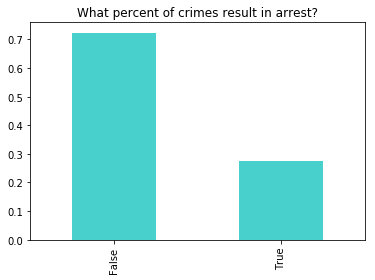

In [70]:
# 2. What percentage of crimes result in arrest?

# For some quick practice, write a function to make a simple barplot of counts. 
# In this dataset, each row is a unique observation, so we count how many observations there are of each type by simply tallying number of rows.

def barplot(element, pcolor, psize, ptitle):
    """ Super simple function to just plot a bar graph. Need to give in order of element, color, size, title. """
    return fdata[element].value_counts(normalize = True).plot(kind = 'bar', color = pcolor, figsize = psize, title = ptitle)

barplot('Arrest', 'mediumturquoise', (6,4), 'What percent of crimes result in arrest?')

# A little less than 30% of crimes result in arrest. 

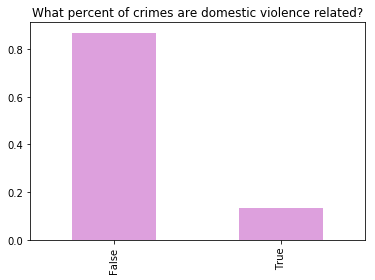

In [71]:
# 3. What percent of crimes are domestic violence-related?

barplot('Domestic', 'plum', (6,4), 'What percent of crimes are domestic violence related?')

# Approximately 15% of incidents are domestic violence related.

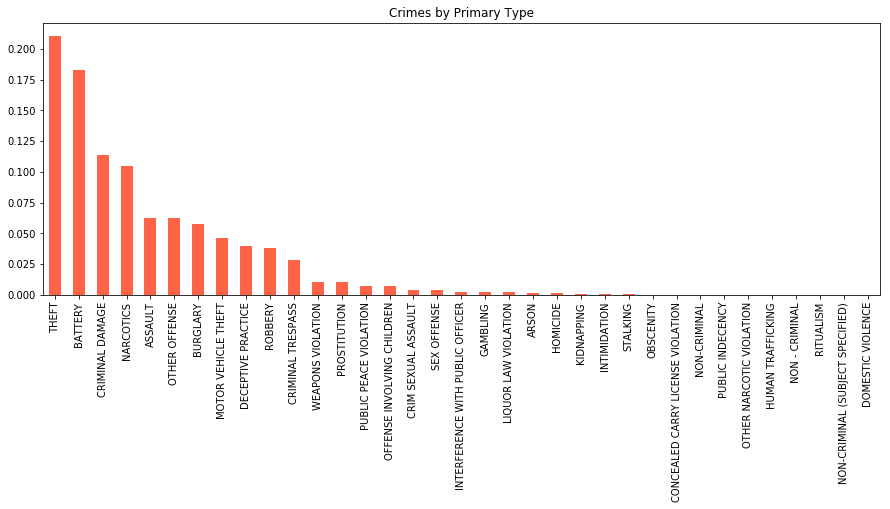

In [76]:
# 4a. What are the most common primary types of crime?

barplot('Primary Type', 'tomato', (15,5), 'Crimes by Primary Type')

# The most common type of incident is theft (>20%), with battery (~18%) coming in at a close second.
# The next three most common are: criminal damage, narcotics, assault.
# Hey, wait a minute: the dataset seemed to suggest that it excludes 'murders,' but I see 'homicide' in the chart below.
# But, maybe this is because of the possible explanation I offered above in the first chunk introducing the dataset, about there being two different types of homicide and this dataset maybe only including one of the types.

In [54]:
# 4b. Another hey, wait a minute: one of the primary types of crime is called "Non-criminal." What does that mean?
# Note that this dataset is named "Chicago Crime Data," but not everything logged in it is a crime!
# First print out all the incident types.
fdata['Primary Type'].value_counts().index.tolist()

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'NARCOTICS',
 'ASSAULT',
 'OTHER OFFENSE',
 'BURGLARY',
 'MOTOR VEHICLE THEFT',
 'DECEPTIVE PRACTICE',
 'ROBBERY',
 'CRIMINAL TRESPASS',
 'WEAPONS VIOLATION',
 'PROSTITUTION',
 'PUBLIC PEACE VIOLATION',
 'OFFENSE INVOLVING CHILDREN',
 'CRIM SEXUAL ASSAULT',
 'SEX OFFENSE',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'GAMBLING',
 'LIQUOR LAW VIOLATION',
 'ARSON',
 'HOMICIDE',
 'KIDNAPPING',
 'INTIMIDATION',
 'STALKING',
 'OBSCENITY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'NON-CRIMINAL',
 'PUBLIC INDECENCY',
 'OTHER NARCOTIC VIOLATION',
 'HUMAN TRAFFICKING',
 'NON - CRIMINAL',
 'RITUALISM',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'DOMESTIC VIOLENCE']

In [55]:
# 4c. Locate just the non-criminal incidents (there are two types).
# It looks like many of these descriptions are relatively innocuous things like "lost passport," where the police may be called but no wrongdoing has occurred.
# So, it may be more accurate to call this a dataset of police-related incidents, and not just crime. 
# Of course, most of the incidents are crime-related, however.

fdata[(fdata['Primary Type'] == 'NON-CRIMINAL') | (fdata['Primary Type'] == 'NON-CRIMINAL (SUBJECT SPECIFIED)')].head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude
47741,01/19/2019 09:30:00 PM,NON-CRIMINAL,FOID - REVOCATION,RESIDENCE,False,False,19.0,2019,41.926017,-87.752360
67563,12/21/2018 08:00:00 AM,NON-CRIMINAL,LOST PASSPORT,APARTMENT,False,False,25.0,2018,41.891896,-87.773626
74831,12/11/2018 09:00:00 AM,NON-CRIMINAL,LOST PASSPORT,RESIDENCE,False,False,19.0,2018,41.924642,-87.767229
89169,11/20/2018 02:00:00 PM,NON-CRIMINAL,LOST PASSPORT,SIDEWALK,False,False,19.0,2018,41.938456,-87.775531
91443,11/16/2018 11:00:00 PM,NON-CRIMINAL,LOST PASSPORT,RESTAURANT,False,False,8.0,2018,41.908850,-87.646646


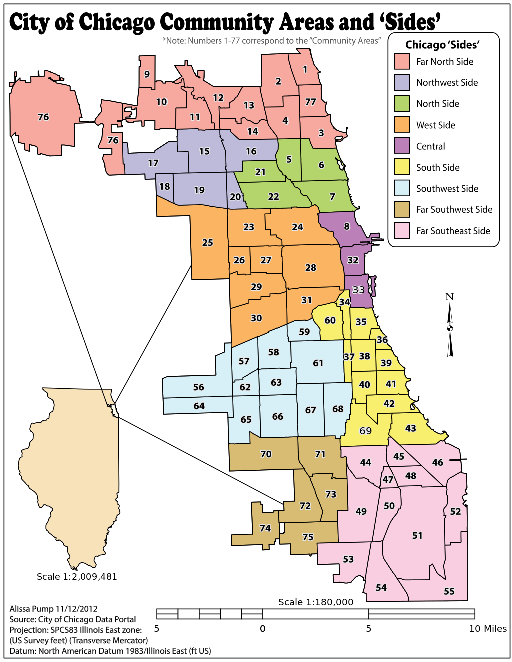

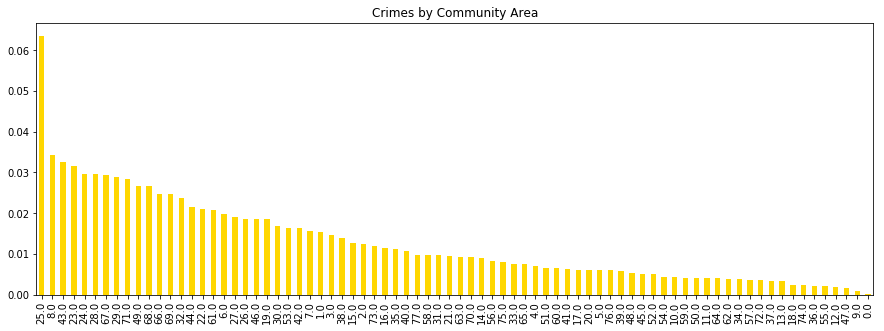

In [77]:
# 5a. Moving on: What is the incidence of crimes by Community Area? More explanation is below this cell.

barplot('Community Area', 'gold', (15,5), 'Crimes by Community Area')

# To understand this, the following image is helpful:
img = Image.open('./Chicago_community_areas.png')
w, h = img.size 
img.resize((w/2, h/2)) 

There's some more writing here, so I'm going to put it in Markdown instead of code comments.

Chicago is divided into 77 community areas (and these include smaller divisions known as neighborhoods). Their descriptions can be found at https://en.wikipedia.org/wiki/Community_areas_in_Chicago.

Surprisingly, community area #25 by far has the most incidents associated with it, with twice as many as the second place community area. Community area #25 is named Austin, and it contains the neighborhoods of Galewood and The Island. I didn't really hear much (either good or bad) about these neighborhoods when I was in Chicago, and frankly I don't really have any guesses for why this area might have the most incidents.

The community area with the second most incidents is #8, named the Near North Side. It includes the neighborhoods of Gold Coast, Magnificent Mile (aka the main shopping district of downtown Chicago), River North, Streeterville, and some others. In comparison to the neighborhoods in community area #25, I have actually heard of these neighborhoods and know of them as popular places to shop and dine. In fact, if you look at the map, you can see that #8 includes Navy Pier, which is one of the major tourist attractions. I suppose it makes sense there might be more incidents happening here because there is a high density of people, and especially people who might be vulnerable i.e. tourists. I would predict that thefts are more common here than in other community areas.

The community area with the fewest incidents is #9, Edison Park. It's in the broader classification known as the Far North Side. I know that in general, the northern part is known to be one of the safer regions of Chicago, and I wonder if this extends to the Far North Side as well.

I went to college in community area #41, named Hyde Park. The number of incidents there seems to be on the lower side (it's about 2/3 down the graph from the left). I wonder if part of this is because my college had a private police force that handled many of the matters on campus, as anecdotally we certainly had our share of muggings.

Additionally, I have heard of the Englewood neighborhood getting a bad rap for crime, particularly homicides. Looking at the Wikipedia page, I see that this neighborhood is also its own community area: #68. On this graph, it does to be one of the higher-crime community areas.

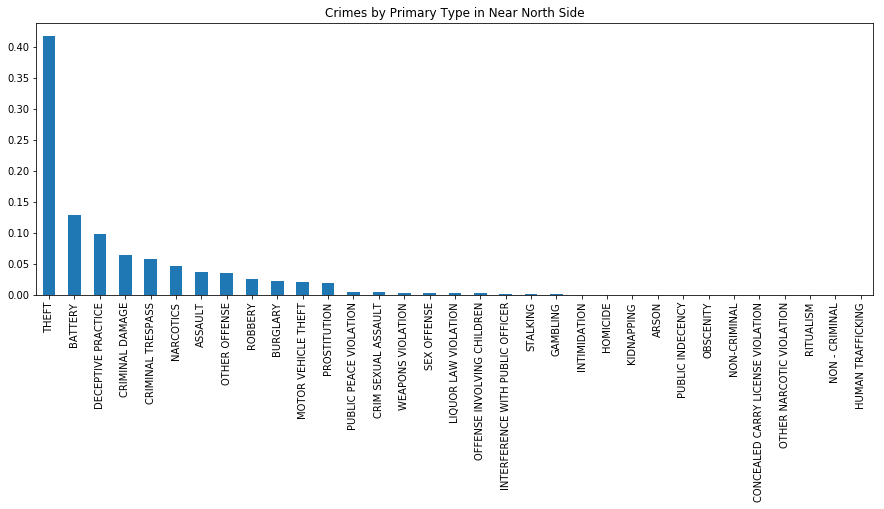

In [79]:
# 5b. Following up on my speculation in the cell above about the Near North Side having a higher incidence of theft than average because it is a touristy area.
# In the graph of crimes by primary type above, incidence of theft was only slightly higher than that of the next most common crime type, battery.
# For community area #8, however, theft is ~3x more common than the next most frequent type of crime (still battery).

data8 = fdata[fdata['Community Area'] == 8]
data8['Primary Type'].value_counts(normalize = True).plot(kind = 'bar', figsize = (15,5), title = 'Crimes by Primary Type in Near North Side')

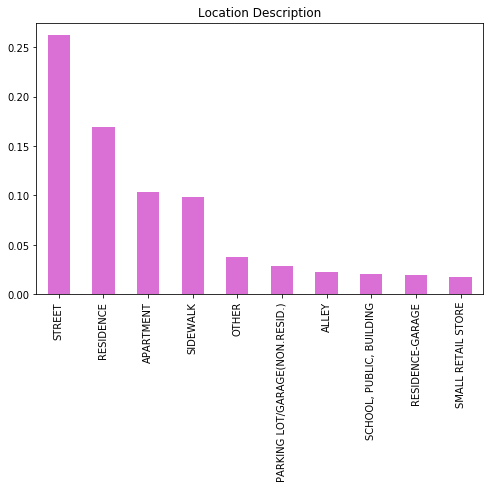

In [82]:
# 6. In what kind of setting do most crimes occur? Show only the top 10 locations.
fdata['Location Description'].value_counts(normalize = True).head(10).plot(kind = 'bar', color = 'orchid', figsize = (8,5), title = 'Location Description')

# The most common location is on the street (>25%), then at a residence (~17%) (presumably a residence is a house rather than an apartment).
# Frankly, some of these distinctions are a little unclear to me, e.g. street (#1) vs sidewalk (#4). I'm speculating that street could be on the road itself plus the sidewalk, whereas sidewalk is specifically the sidewalk?

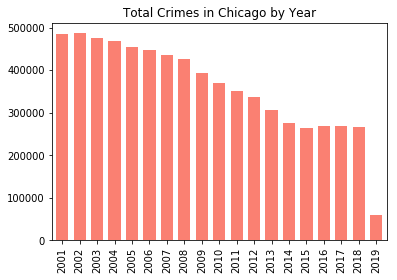

In [84]:
# 7. Globally over the years, what has incidence of crime been in Chicago? Make bar widths a little thicker.
fdata['Year'].value_counts().sort_index().plot.bar(width = 0.7, color = 'salmon', title = 'Total Crimes in Chicago by Year')

# Encouragingly, total crime incidents seem to have decreased since 2001, with a steady decline from 2001-2013 and then a plateau starting in 2014.
# I wonder what changed in 2014? Or did we just reach a reasonable amount of crime and plateau there?
# (Of course, we can also wonder whether something changed in method of measurement and whether simply fewer incidents were reported and logged. But hopefully the apparent decrease in crime is true.)
# The bar for 2019 is low because the year 2019 has not yet completed. 
# However, if we assume that 1/4 of the year has passed (Jan-Mar), then the final count should be 4x the current bar, which would be consistent with values from 2015-2018.

In [21]:
# 8a. At what time of day do most incidents happen?
# The 'Date' column lists date as 'MM/DD/YYYY HH:MM:SS _M'.
# I wanted to split the dates into two strings, day and time: 'MM/DD/YYYY' and 'HH:MM:SS *M'.
# (I did this because I thought I had to to convert the time data to 24 hr time manually, and so I needed to separate the strings. I later realized this was not necessary, but I'll continue on this for now.)
# However, I tried to do this for the entire dataset and it still hadn't finished running after at least 20 minutes.
# Instead, I did this for a random sample of 10000 rows from the complete data, called 'sdata'.

sdata = fdata.sample(10000, random_state = 123)

# By the way, these 10000 rows compose 1% of the entire dataset. Note to self: need to make one of the numbers in the division a decimal, or Python 2 will return 0 because that is the closest integer.
10000.0/6844979

# Separate into day and time strings: 'MM/DD/YYYY' and 'HH:MM:SS *M'.
sdata[['Day', 'Time']] = sdata['Date'].str.split(' ', 1).apply(pd.Series)

In [22]:
# Write a function for converting the 12 hr time (used in the time string) 'HH:MM:SS *M' format to 24 hr time.

def convert_to_24(time):
    """ Convert 12 hr time (written with AM and PM) to 24 hr time """
    
    # For times that are like 12:30:00 AM that should look like 00:30:00
    if 'AM' in time and time[:2] == '12':
        return '00' + time[2:-3]
    
    # For times like 11:30:00 AM that should look like 11:30:00
    elif 'AM' in time:
        return time[:-3]
        
    # For times like 12:30:00 PM that should look like 12:30:00 
    elif 'PM' in time and time[:2] == '12':
        return time[:-3]
    
    # For times like 3:30:00 PM that should look like 15:30:00 
    else:
        return str(int(time[0:2]) + 12) + time[2:8]
    
# Testing the function
print(convert_to_24("03:30:00 PM")) 

15:30:00


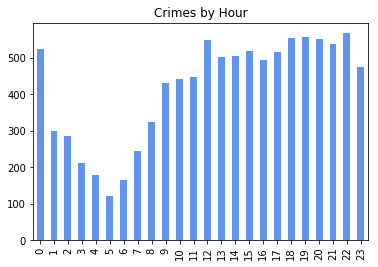

In [86]:
# Convert the 12 hr time to 24 hr time
sdata['Time'].apply(convert_to_24)

# Convert to datetime format.
# (Referring to what I hinted at above, at this point I had not realized that datetime already had the capability to convert 12 hr time to 24hr time, and that I did not need to do it myself.)
# (However, I left my clunkier method as a reminder of how to split strings.)
# Since the 'Time' column used in the rest of this cell does not contain any day information, datetime automatically fills in with today's date. But that's okay because I am not using the day information here.
sdata['Datetime_Time'] = pd.to_datetime(sdata['Time'])

# Extract hour.
sdata['Hour'] = sdata['Datetime_Time'].dt.hour

# Plot number of crimes by hour.
sdata['Hour'].value_counts().sort_index().plot(kind = 'bar', title = 'Crimes by Hour', color = 'cornflowerblue')

# According to this subsample of data, crime incidence is lowest at 4-5 AM in the morning and generally increases in frequency up to ~7 PM, after which it then decreases slowly, with a drastic drop-off by 1 AM.
# This is somewhat expected, as probably few people are awake during what I would consider the "deepest" part of the night, around ~3-4 AM.
# Additionally, it kind of makes sense that more people are out and about around "early" nighttime i.e. ~7-8 PM rather than later. This would mean more people who commit crimes and more people to commit crimes against.
# Plus, it's generally dark by 8 PM so there's some night cover around that time too. Perhaps that is a happy balance of having people around and having night cover.
# The slight spike in crime at noon is a bit hard to explain. Maybe it coincides with lunch break? Or maybe it is an artifact of estimation, where noon is simply a close reference time?

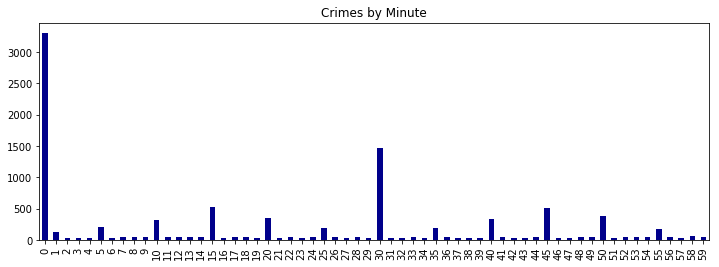

In [87]:
# 8b. How about frequency of crime at the minute level, i.e. is there a minute on the hour that is most popular? One would expect the answer to be no.
sdata['Minute'] = sdata['Datetime_Time'].dt.minute
sdata['Minute'].value_counts().sort_index().plot(kind = 'bar', title = 'Crimes by Minute', color = 'darkblue', figsize = (12,4))

# Actually, the answer naive answer is yes - if we look at the graph, there is a minute that is most popular. 
# However, the result is in reality probably an artifact of rounding. 
# Most incidents are reported to the nearest hour, with the next most common being the nearest half hour, and then the quarter hour.
# This intuitively makes sense for how I would usually estimate time - with a hierarchy of hour > half hour > quarter hour.
# Some incidents are reported to the exact minute, but we can see that this is much less common. 

# (By the way, if we take out the top two bars, the remaining bars create an almost perfectly symmetrical bimodal distribution combined with a constant low-value function.)
# (I don't know if this is actually interesting at all, but I feel like maybe it says something about how we approximate guesses of time.)

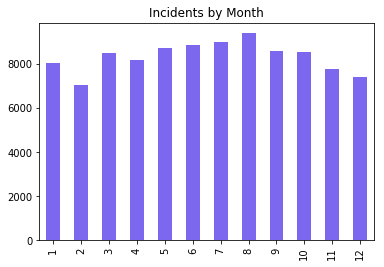

In [86]:
# 8c. Are there months during which incidents are more common?

sdata['Datetime_Day'] = pd.to_datetime(sdata['Day'])
sdata['Month'] = sdata['Datetime_Day'].dt.month
sdata['Month'].value_counts().sort_index().plot(kind = 'bar', title = 'Incidents by Month', color = 'mediumslateblue')

# Overall, the month-to-month differences aren't huge. 
# However, the months with the most incidents are July-August, and the months with the fewest incidents are December and February.
# This overall appears to make sense, since fewer people are out during the colder months, meaning there are fewer people to be victims or perpetrators, and vice versa.

In [89]:
# 9a. Let's just briefly repeat this for just the year 2018, the last year for which the data is complete.
# Taking out just the rows for year 2018.

fdata2018 = fdata[fdata['Year'] == 2018]

In [91]:
# As mentioned above, I later learned that datetime is smart enough to convert 12 hr to 24 hr time, meaning that there was no need for me to do the conversion myself, nor any need to split the 'Date' column name into two strings.
# So, this time I am using the simpler method where I don't do those extra steps.

# Apply datetime function
fdata2018['Datetime'] = pd.to_datetime(fdata2018['Date'])

# There's an error below, but I think it doesn't really affect me so I'll ignore it.

/Users/Shu/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
# 9b. Crime by hour
fdata2018['Datetime'].dt.hour.value_counts().sort_index().plot(kind = 'bar', title = 'Crimes by Hour')

# Results are similar: lowest incidence near the late hours of night / very early hours of morning; a peak around 7pm; and a spike around noon.

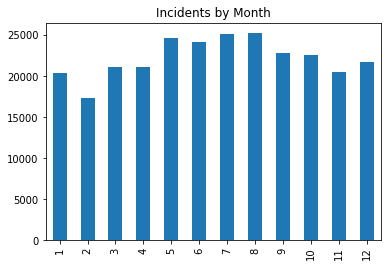

In [96]:
# 9c. Crime by month
fdata2018['Datetime'].dt.month.value_counts().sort_index().plot(kind = 'bar', title = 'Incidents by Month')

# Also a similar trend. 
# From these few graphs, it looks like using the 1% random sample of the 2001-early 2019 data I used above was actually quite similar to the full data from 2018. 
# Since it runs more quickly, I'll use sdata for future graphs.

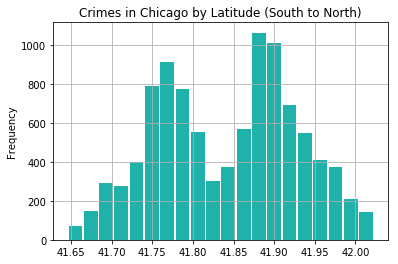

In [93]:
# 10a. How about longitude and latitude information? 
# Actually, geography-type information is best analyzed with something aimed at this task, such as GIS.
# But since I don't have access to that, I will do an approximation.

# For some reason, there is an outlier that really distorts my graph (which auto-selects x and y ranges). So I am restricting the latitudes and longitudes that I look at.

# Plot a histogram of latitude.
lldata = sdata[(sdata['Latitude'] > 41.65) | (sdata['Longitude'] > -87.9)]
lldata['Latitude'].plot.hist(grid=True, bins=20, rwidth=0.9, color='lightseagreen', title = 'Crimes in Chicago by Latitude (South to North)')

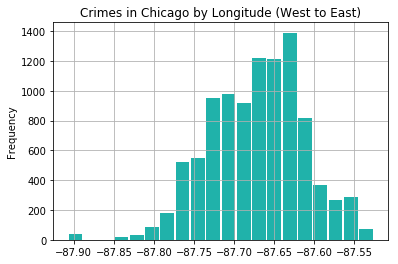

In [94]:
# Plot a histogram of longitude.
lldata['Longitude'].plot.hist(grid=True, bins=20, rwidth=0.9, color='lightseagreen', title = 'Crimes in Chicago by Longitude (West to East)')

Text(0.5,1,'Crimes in Chicago by Latitude (South to North)')

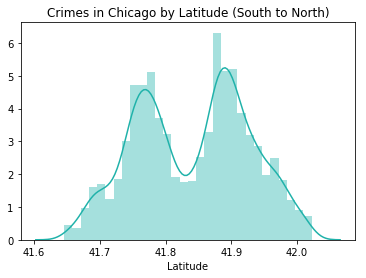

In [98]:
# Actually, if we do this in seaborn we can get a histogram with a kernel density distribution. 
ax = sns.distplot(lldata['Latitude'], color = 'lightseagreen')
ax.set_title('Crimes in Chicago by Latitude (South to North)')

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,  40.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   2.,   4.,  11.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,  15.,   4.,   5.,   4.,   3.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   4.,   4.,   2.,   0.,   0.,
           0.,   0.,   2.,  22.,  24.,  12.,  12.,   5.,   2.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   4.,  21.,   1.,   0.,   0.,
           2.,   0.,  15.,  47.,  43.,  21.,  14.,  15.,   0.],
        [  0.,   0.,   0., 

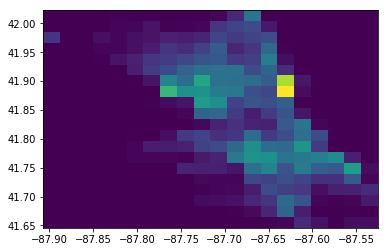

In [106]:
# Using matplotlib, we can also plot a two-way histogram.
# First, convert the latitude and longitude data to a numpy array, since it won't take the original form.

plt.hist2d(np.array(lldata['Longitude']), np.array(lldata['Latitude']), bins = 20)

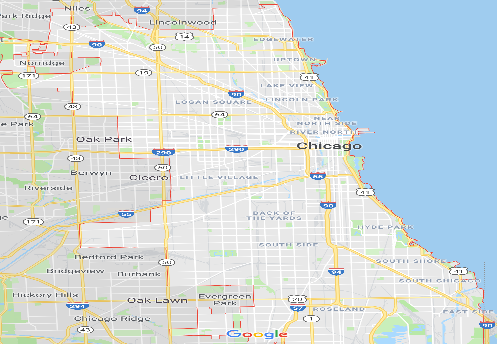

In [108]:
# Unsurprisingly, the 2D histogram approximates the shape of Chicago, shown below in a screenshot from Google maps. 
# (I distorted the map image so it would look a bit more similar.)

img2 = Image.open('./Chicago_map.png')
w, h = img2.size 
img2.resize((w/2, h/4))

# If we compare the 2D histogram above with the map image below, it seems that the highest density of crime actually happens in downtown Chicago.
# Additionally, it seems to happen in two general circles, one for northern Chicago and one for southern Chicago.
# This was generally surprising to me, since people always talk about crime being especially bad on the South Side. 
# However, I think this is probably because this dataset excludes most murders, and the news tends to focus on murders, which do happen more frequently on the South Side according to other sources.
# So, we can probalby see this dataset mostly as an analysis of non-murderous crime, and there the distribution looks different.

In [2]:
sns.jointplot(x = np.array(lldata['Longitude']), y = np.array(lldata['Latitude']));

NameError: name 'sns' is not defined

# Summary

This project analyzed the "Chicago Crime Dataset" downloaded from the City of Chicago website. More specifically, this project aimed to break down crime / police-related incidents in Chicago from 2001 to early 2019, by factors such as incident type, location, etc. Although far from the most powerful use of Python, simple data analysis is probably the most likely application for which I might use Python in the future. (Tentatively, I guess my main long-term goal would be to do statistical analysis for clinical data.) My previous experience has been some basic knowledge of R (enough to make decent graphs and do linear regression) and Stata (also in linear regression, just because my stats classes in college used both R and Stata). It seems kind of strange to learn how to do much of the same in Python, but I'm hoping this will open the door to learning how to do more complex stuff that can only be done in a "real" programming language like Python.

### Takeaways from the Chicago Crime Data:
- Incidence of crime tends to peak with amount of human activity.
- The most common type of crime is theft.
- Crime seems to peak around the downtown Chicago area.

### What I learned:
- How to actually run Python! I had downloaded it previously but didn't know about IDEs or how to use it. Having a class helped provide the activation energy to actually use the language, for which I'm very grateful.
- A tiny bit of what GitHub is. I still don't totally get it, nor the frequently obtuse lingo, but I'm better off than when I started.
- This is probably not true for everyone, but I learned that even the simplest thing can require extensive Googling. Sometimes it takes a mountain to move just a foot, man.

### The end, thanks for reading!